In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=6478bb452ad2cc848d958d054ca6340dbfa510f734a4dcfbe8157bd4b593728b
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
spark = SparkSession.builder.appName('Student DF').getOrCreate()
pyspark.sql.session.SparkSession

pyspark.sql.session.SparkSession

In [3]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
data = spark.read.csv("drive/My Drive/Colab Notebooks/Data/students.csv", header=True,inferSchema=True)
data.show()
data.printSchema()

+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading score|writing score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|female|       group B|          bachelor's degree|    standard|                   none|        72|           72|           74|
|female|       group C|               some college|    standard|              completed|        69|           90|           88|
|female|       group B|            master's degree|    standard|                   none|        90|           95|           93|
|  male|       group A|         associate's degree|free/reduced|                   none|        47|           57|           44|
|  male|       group C|               some college|    standard|                   none|        76|     

In [7]:
 #1. Number of male and female students
data.select(col('gender')).groupBy('gender').count().show()

+------+-----+
|gender|count|
+------+-----+
|female|  518|
|  male|  482|
+------+-----+



In [8]:
#2. List different 'race/ethnicity'
data.select(col('race/ethnicity')).distinct().show()

+--------------+
|race/ethnicity|
+--------------+
|       group B|
|       group C|
|       group D|
|       group A|
|       group E|
+--------------+



In [9]:
#3. What are different 'parental level of education'?
data.select(col('parental level of education')).distinct().show()

+---------------------------+
|parental level of education|
+---------------------------+
|           some high school|
|         associate's degree|
|                high school|
|          bachelor's degree|
|            master's degree|
|               some college|
+---------------------------+



In [11]:
#4. How many female students scored more than 79 marks in math, whose parental level of education is 'high school'?

data.select('gender').where(col('gender')=='female').where(col('math score')>79).where(col('parental level of education')=='high school').count()

5

In [12]:
#5. Check whether average maths score of male or female students are high?

female=data.filter(col('gender')=='female').selectExpr("avg(`math score`)").collect()[0][0]
male=data.filter(col('gender')=='male').selectExpr("avg(`math score`)").collect()[0][0]
if female>male:
  print("Female average=",female)
else:
  print("Male average=",male)

Male average= 68.72821576763485


In [16]:
#6. What is average reading score of male and female students?

male_student=data.filter(col('gender')=='male').selectExpr("avg(`reading score`)").collect()[0][0]
female_student=data.filter(col('gender')=='female').selectExpr("avg(`reading score`)").collect()[0][0]
print(male, female)

65.47302904564316 72.60810810810811


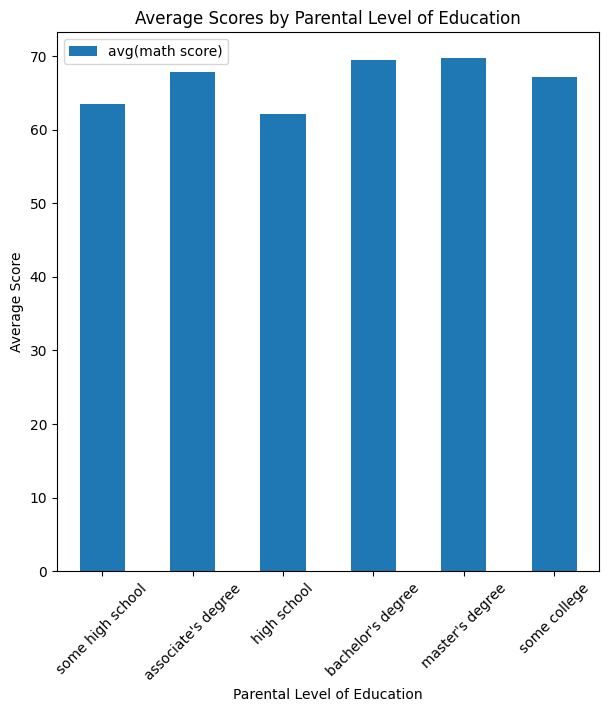

In [19]:
#7. Whether students score depends upon 'parental level of education'? Justify your answer

import matplotlib.pyplot as plt
import pandas as pd
score=data.select(col('parental level of education'),col('math score')).groupBy('parental level of education').mean()
scores=score.toPandas()
scores.plot(x='parental level of education',kind='bar', figsize=(7, 7))
plt.title("Average Scores by Parental Level of Education")
plt.xlabel("Parental Level of Education")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()

In [20]:
#8. List the records where 'test preparation course' is 'none' and scored more than 70 in maths
data.filter(col('test preparation course')=='none').filter(col('math score')>70).show()

+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading score|writing score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|female|       group B|          bachelor's degree|    standard|                   none|        72|           72|           74|
|female|       group B|            master's degree|    standard|                   none|        90|           95|           93|
|  male|       group C|               some college|    standard|                   none|        76|           78|           75|
|female|       group B|         associate's degree|    standard|                   none|        71|           83|           78|
|  male|       group C|                high school|    standard|                   none|        88|     